In [120]:
import pandas as pd
import yfinance as yahoo
import matplotlib.pyplot as plt

In [161]:
merval = yahoo.download(tickers="BMA.BA  CRES.BA "
                              "EDN.BA GGAL.BA IRSA.BA LOMA.BA "
                              "PAMP.BA SUPV.BA TECO2.BA TGSU2.BA YPFD.BA ARS=X ", period="10y")['Adj Close']


[*********************100%***********************]  12 of 12 completed


In [162]:
merval = merval.rename(columns={'BMA.BA':'BMABA', 'CRES.BA': 'CRESBA', 'EDN.BA':'EDNBA',
                            'GGAL.BA':'GGALBA', 'IRSA.BA':'IRSABA', 'LOMA.BA':'LOMABA', 'PAMP.BA':'PAMPBA',
                            'SUPV.BA':'SUPVBA', 'TECO2.BA':'TECO2BA', 'TGSU2.BA':'TGSU2BA', 'YPFD.BA':'YPFDBA',
                            'ARS=X':'USDARS'})

merval = merval.fillna(method='ffill')

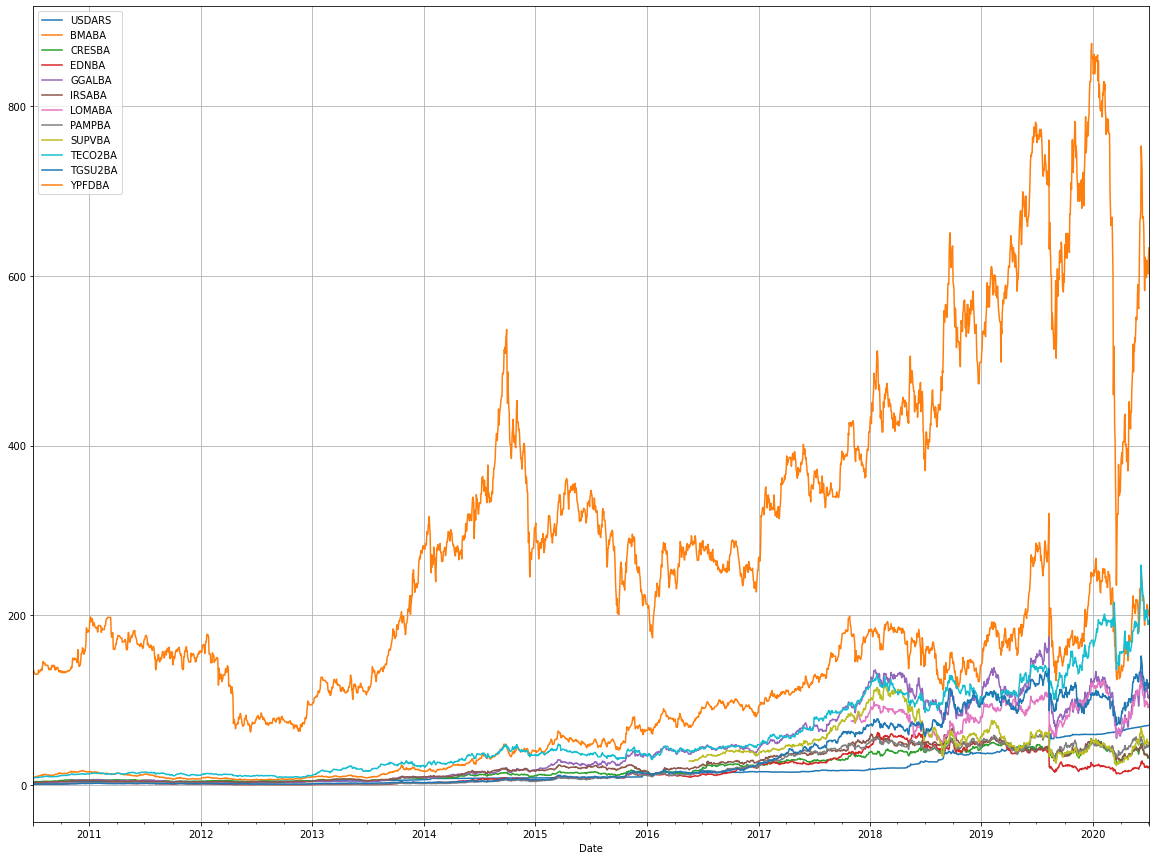

In [163]:
cotizacion_historica = merval.plot(figsize=(20,15))
cotizacion_historica.grid()

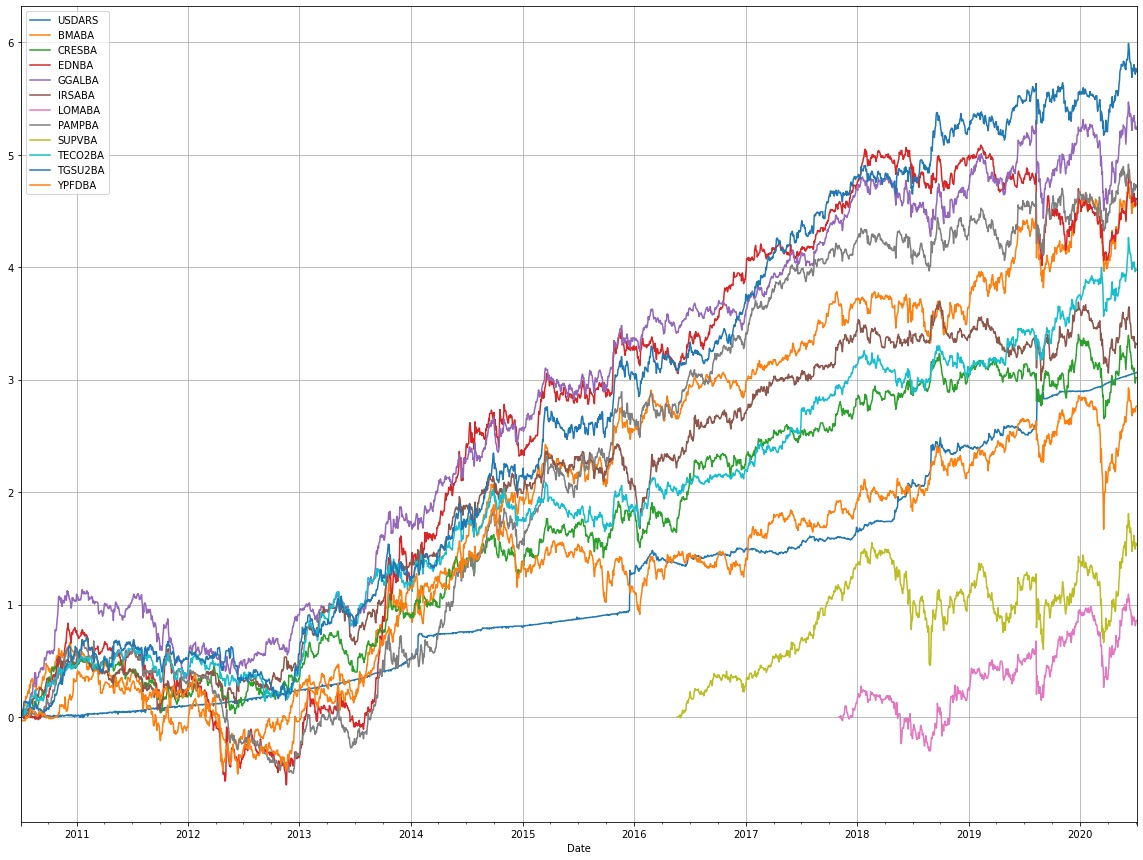

In [164]:
rentabilidad = merval.pct_change().cumsum().plot(figsize=(20,15))
rentabilidad.grid()

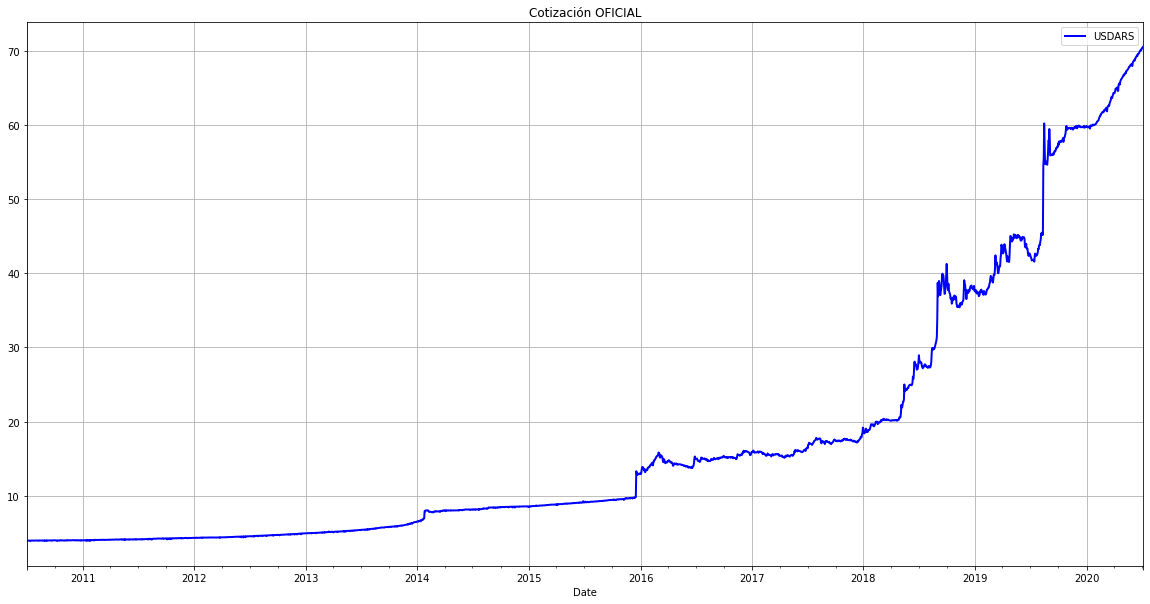

In [165]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111)
merval.USDARS.plot(ax=ax1, color='b', lw=2., legend=True)
ax1.grid()
plt.title('Cotización OFICIAL')
plt.show()

In [166]:
# Incorporamos los ADRs y así el dolar que esta operando el mercado
data = yahoo.download(tickers="BMA BMA.BA CEPU CEPU.BA  CRESY CRES.BA "
                              "EDN EDN.BA GGAL GGAL.BA IRS IRSA.BA LOMA LOMA.BA PAM "
                              " PAMP.BA SUPV SUPV.BA TEO TECO2.BA TGS TGSU2.BA YPF YPFD.BA ARS=X", period="10y")['Adj Close']

data = data.rename(columns={'BMA.BA':'BMABA', 'CEPU.BA':'CEPUBA', 'CRES.BA': 'CRESBA', 'EDN.BA':'EDNBA',
                            'GGAL.BA':'GGALBA', 'IRSA.BA':'IRSABA', 'LOMA.BA':'LOMABA', 'PAMP.BA':'PAMPBA',
                            'SUPV.BA':'SUPVBA', 'TECO2.BA':'TECO2BA', 'TGSU2.BA':'TGSU2BA', 'YPFD.BA':'YPFDBA',
                            'ARS=X':'USDARS'})

data = data.fillna(method='ffill')

cable = pd.DataFrame(data=None)

cable['BMA'] = (data.BMABA / data.BMA) * 10
cable['CEPU'] = (data.CEPUBA / data.CEPU) * 10
cable['CRES'] = (data.CRESBA / data.CRESY) * 10
cable['EDN'] = (data.EDNBA / data.EDN) * 20
cable['GGAL'] = (data.GGALBA / data.GGAL) * 10
cable['IRSA'] = (data.IRSABA / data.IRS) * 10
cable['LOMA'] = (data.LOMABA / data.LOMA) * 5
cable['PAMP'] = (data.PAMPBA / data.PAM) * 25
cable['SUPV'] = (data.SUPVBA / data.SUPV) * 5
cable['TECO2'] = (data.TECO2BA / data.TEO) * 5
cable['TGSU2'] = (data.TGSU2BA / data.TGS) * 5
cable['YPF'] = (data.YPFDBA / data.YPF)


[*********************100%***********************]  25 of 25 completed


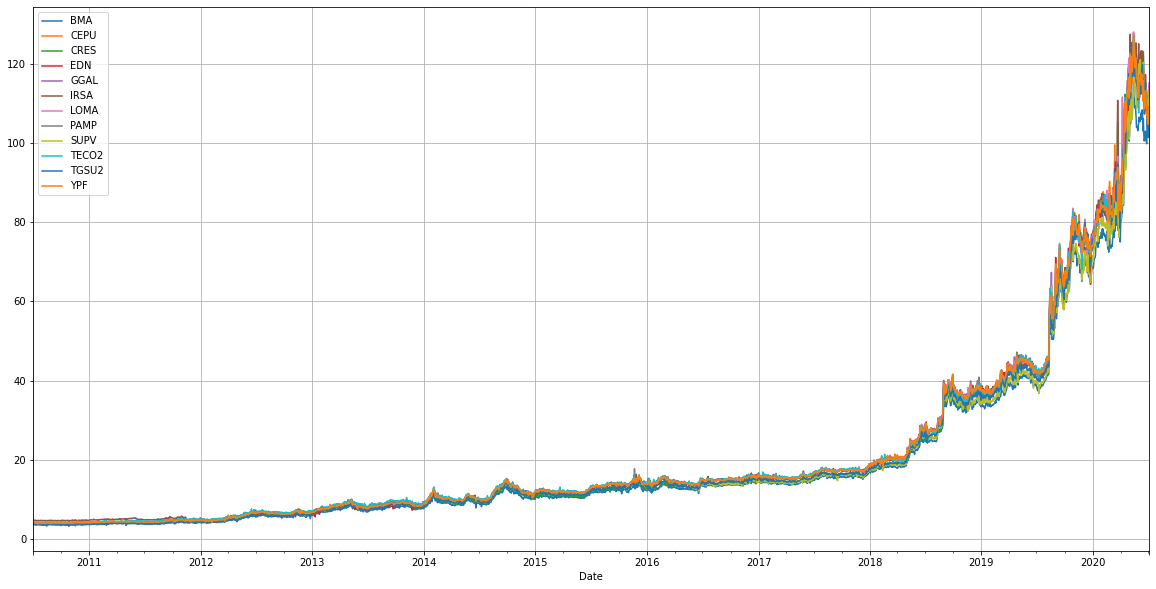

In [167]:
adr = cable.plot(figsize=(20,10))
adr.grid()

In [128]:
mervaladj = pd.DataFrame(None)
mervaladj['BMABA'] = merval.BMABA / cable.BMA
mervaladj['CEPUBA'] = merval.CEPUBA / cable.CEPU
mervaladj['CRESBA'] = merval.CRESBA / cable.CRES
mervaladj['EDNBA'] = merval.EDNBA / cable.EDN
mervaladj['GGALBA'] = merval.GGALBA / cable.GGAL
mervaladj['IRSABA'] = merval.IRSABA / cable.IRSA
mervaladj['LOMABA'] = merval.LOMABA / cable.LOMA
mervaladj['SUPVBA'] = merval.SUPVBA / cable.SUPV
mervaladj['TECO2BA'] = merval.TECO2BA / cable.TECO2
mervaladj['TGSU2BA'] = merval.TGSU2BA / cable.TGSU2
mervaladj['YPFDBA'] = merval.YPFDBA / cable.YPF

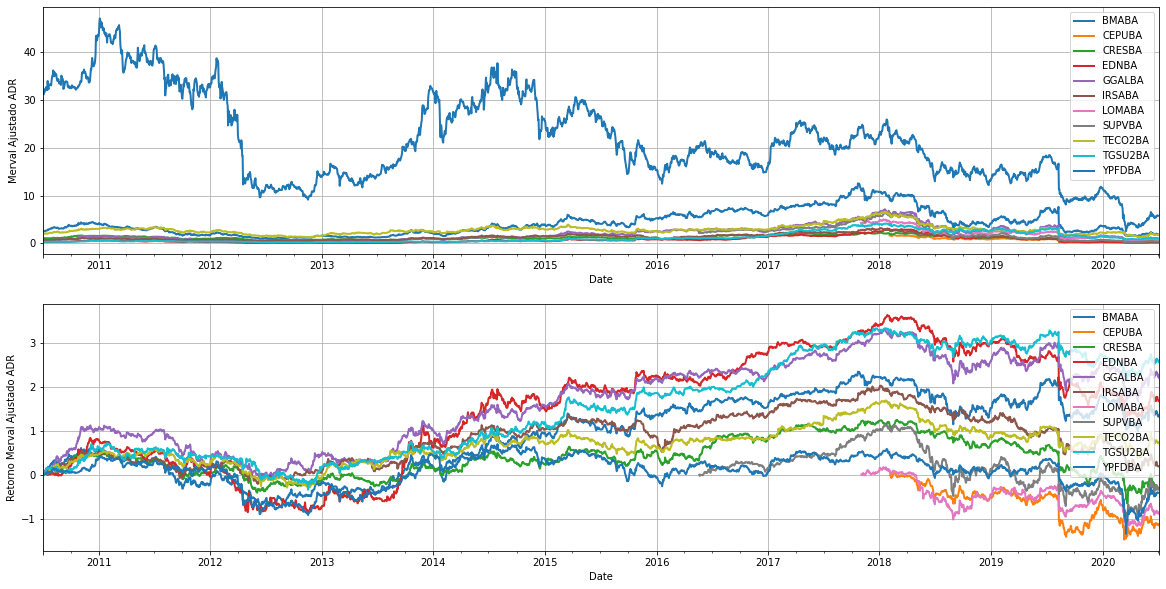

In [129]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(211, ylabel='Merval Ajustado ADR')
mervaladj.plot(ax=ax1, lw=2., legend=True)
ax1.grid()
ax2 = fig.add_subplot(212, ylabel='Retorno Merval Ajustado ADR')
mervaladj.pct_change().cumsum().plot(ax=ax2, lw=2., legend=True)
ax2.grid()
plt.show()

In [168]:
data = yahoo.download(tickers="AIG AIG.BA ", period="10y")['Adj Close']

data = data.fillna(method='ffill')

data = data.rename(columns={'AIG.BA':'AIGBA'})

[*********************100%***********************]  2 of 2 completed


In [169]:
cedears = pd.DataFrame()

cedears['AIG'] = (data.AIGBA / data.AIG) * 5

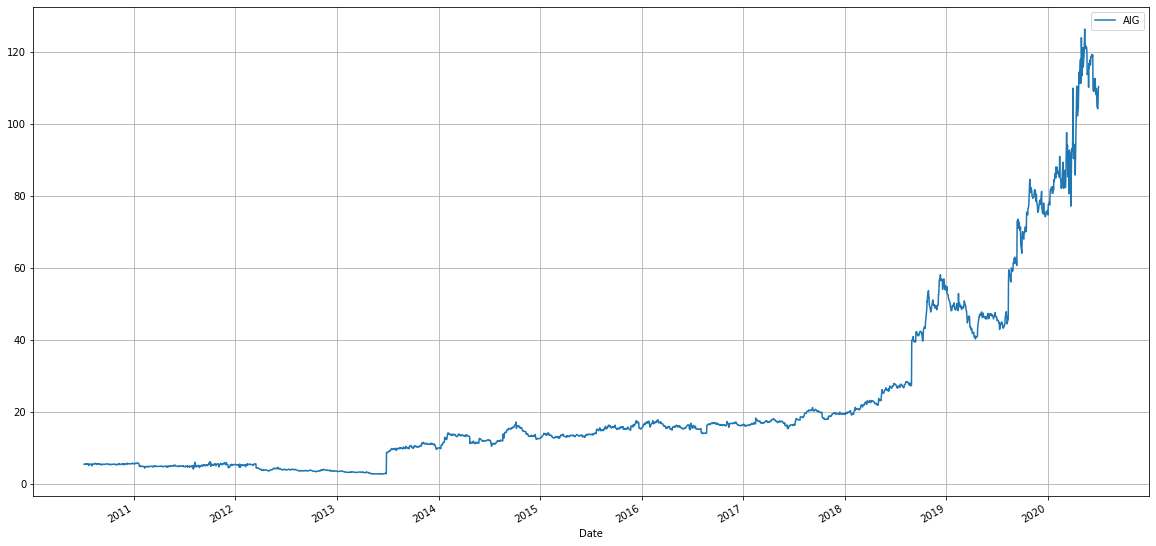

In [171]:
aig = cedears.plot(figsize=(20,10))
aig.grid()

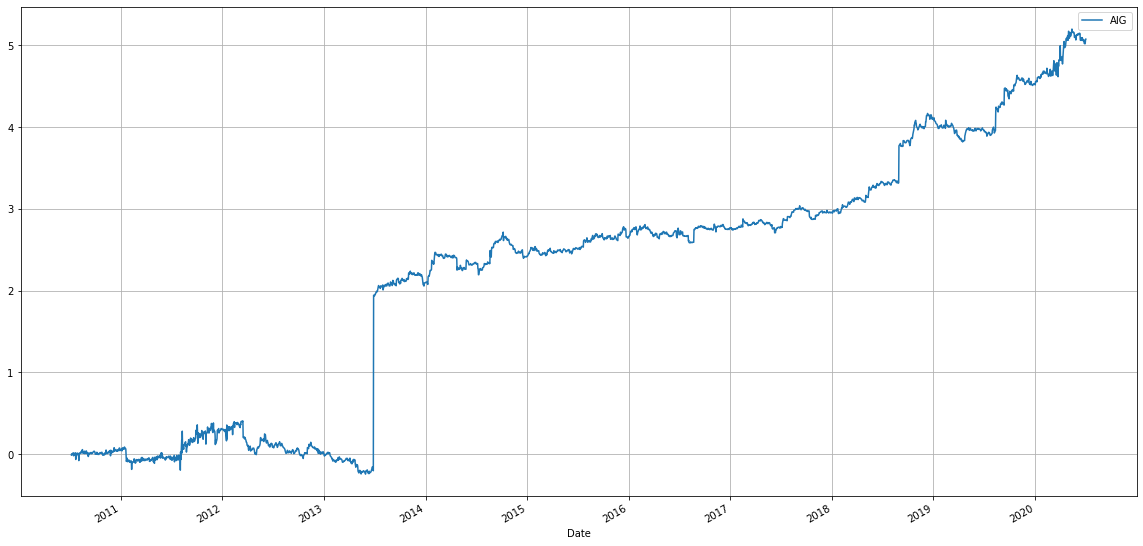

In [175]:
aig = cedears.pct_change().cumsum().plot(figsize=(20,10))
aig.grid()

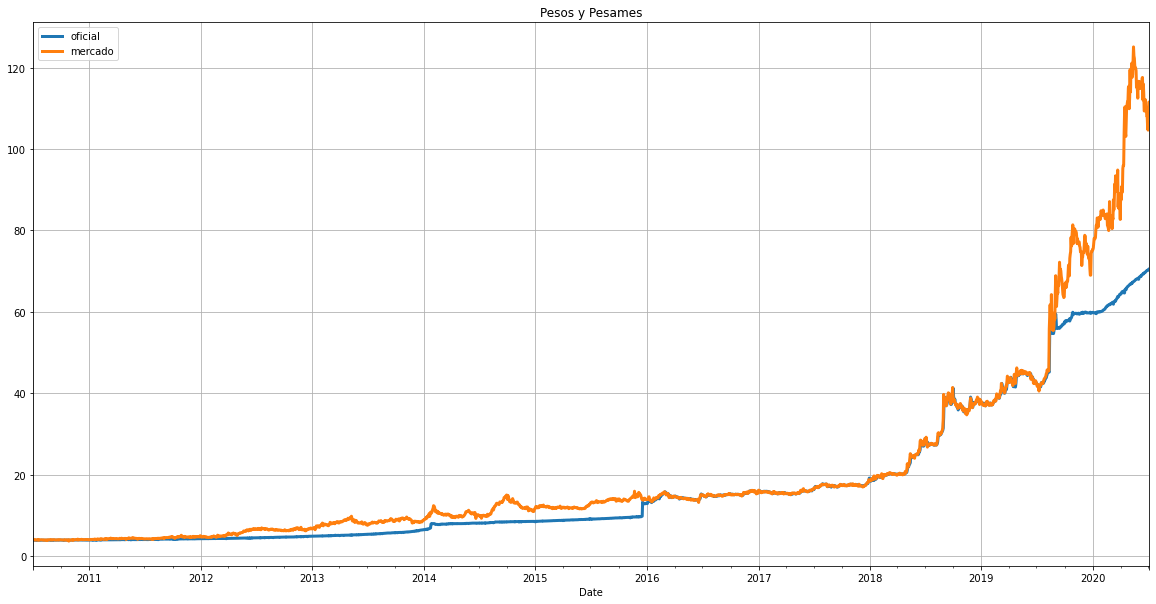

In [157]:
historia = pd.DataFrame()
historia['oficial'] = merval.USDARS
historia['mercado'] = (cable.YPF + cable.GGAL + cable.EDN) / 3
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111)
historia.plot(ax=ax1, lw=3., legend=True)
ax1.grid()
plt.title('Pesos y Pesames')
plt.show()

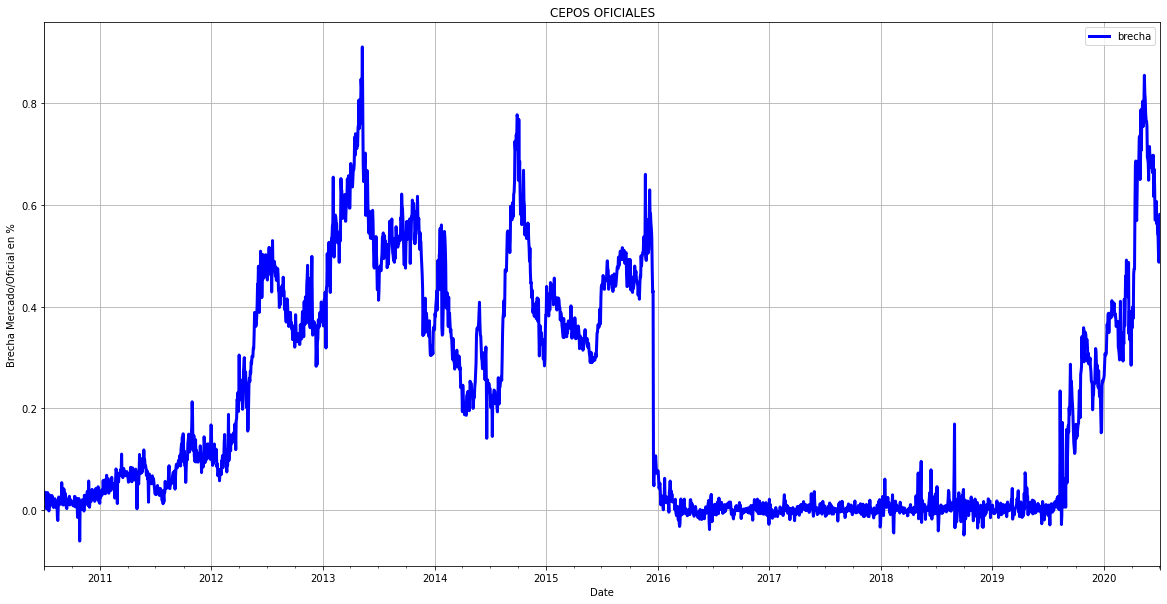

In [145]:
historia['brecha'] = (historia.mercado / historia.oficial) - 1
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111, ylabel='Brecha Mercado/Oficial en %')
historia.brecha.plot(ax=ax1, color='b', lw=3., legend=True)
ax1.grid()
plt.title('CEPOS OFICIALES')
plt.show()